In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
import ML_algorithms

In [2]:
df = utils.get_dataset()

In [3]:
df = feature_engineering.drop_useless_columns(df)

In [4]:
df = preprocessing.to_dtype_object(df)

In [5]:
df = preprocessing.encode_days_as_costumer(df)

In [6]:
df = df.dropna()

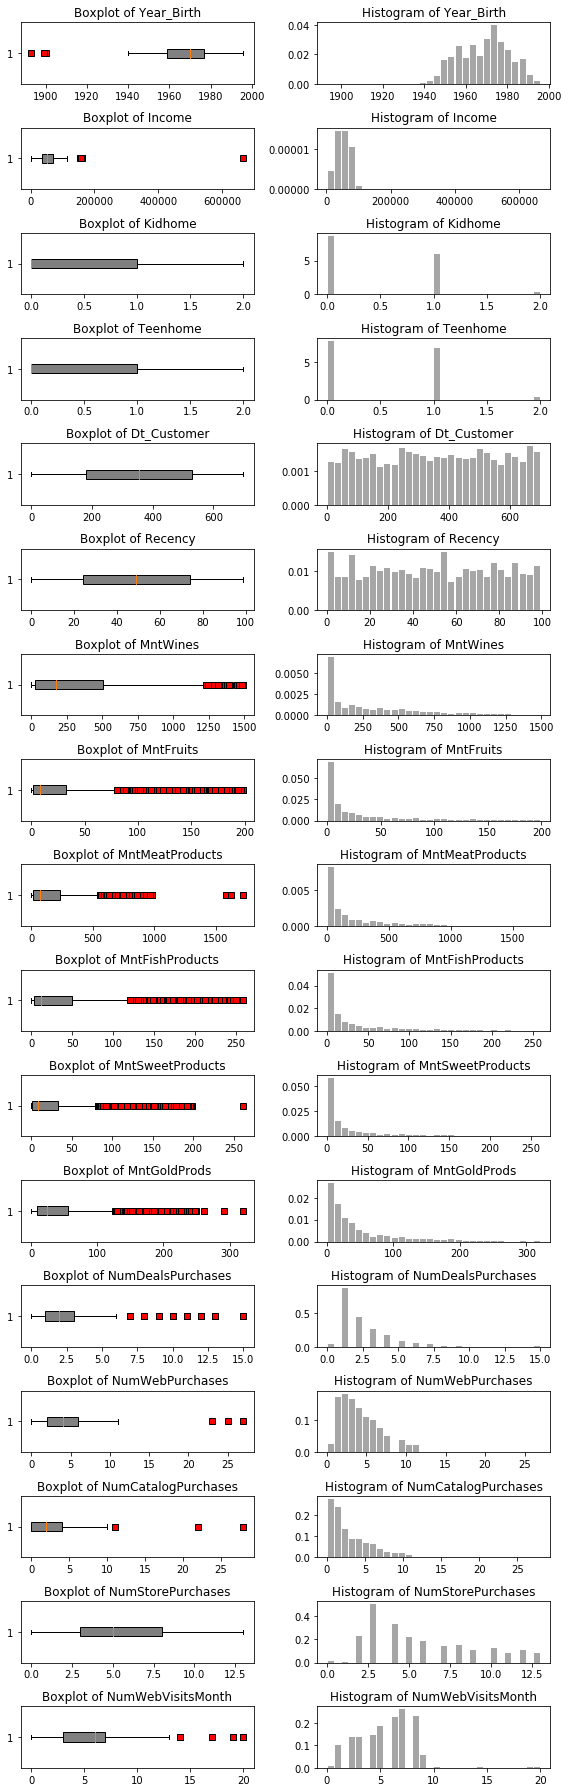

In [7]:
data_visualization.univariate_outlier_id_plot(df)

In [85]:
#columns = ["Year_Birth","Income","Dt_Customer","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]

def outlier_IQR(df, columns=["Year_Birth","Income"]):
    """
    outlier deletetion using the IQR, you can choose the variables you want to delete the outliers for by selecting the columns. The default is Year_Birth & Income. Also you can change the quantile values.
    """
    dataframe = df.copy()
    Q1 = dataframe[columns].quantile(0.25)
    Q3 = dataframe[columns].quantile(0.75)
    IQR = Q3 - Q1
    #print(IQR)
    dataframe[columns] = dataframe[columns][~((dataframe < (Q1 - 2 * IQR)) |(dataframe > (Q3 + 2 * IQR))).any(axis=1)]
    dataframe = dataframe.dropna()
    print('Removing outliers using the IQR method with 2 quartiles would lead to a change of data size: ',(dataframe.shape[0] -df.shape[0]) /df.shape[0])
    return dataframe

In [120]:
def outlier_ZSCORE(df, columns=["Year_Birth", "Income"], threshold=3):
    """
    outlier deletion using the Zscore, you can choose which columns you want to apply it on and you can choose which threshold you want to use.
    """
    dataframe = df.copy()
    columns_zscore = []
    for i in dataframe[columns]:
        i_zscore = i + "_zscore"
        columns_zscore.append(str(i_zscore))
        
        dataframe[i_zscore] = (dataframe[i] - dataframe[i].mean())/df[i].std(ddof=0)
    for i in dataframe[columns_zscore]:
        dataframe = dataframe[(dataframe[i] < threshold) & (dataframe[i] > -threshold)]
    dataframe = dataframe.drop(columns_zscore, axis=1)
    print('Removing outliers using the ZSCORES method with a threshold of 3 would lead to a change of data size: ',(dataframe.shape[0] -df.shape[0]) /df.shape[0])
    return dataframe

In [125]:
outlier_IQR(df,["Year_Birth","Income","MntSweetProducts","MntMeatProducts","MntGoldProds"]).head()

outlier_ZSCORE(df,["Year_Birth","Income","MntSweetProducts","MntMeatProducts","MntGoldProds"]).head()

Removing outliers using the IQR method with 2 quartiles would lead to a change of data size:  -0.16967509025270758
Removing outliers using the ZSCORES method with a threshold of 3 would lead to a change of data size:  -0.06498194945848375


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,663,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,113,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,312,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,139,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,161,94,173,43,...,3,6,5,0,0,0,0,0,0,0
